<h1>Soal 1: Pemahaman</h1>

1. Sebutkan apa saja yang termasuk preprocessing data!
2. Jelaskan beberapa cara imputing missing value!
3. Kapan kita perlu melakukan feature centering dan scaling?
4. Bagaimana Data Science Workflow?

Jawab:

1. - Binarization: variabel numerik ke boolean
    - Mean Removal: menghilangkan rata2
    - Scaling: scale feature variabel yg nilainya sangat bervariasi / random dari data mentah
    - Normalization: memodifikasi nilai dalam varabel sehingga kita dapat mengukurnya dalam skala umum (range 0 - 1)
    - Label encoding: mengubah label klasifikasi yg bersifat ordinal maupun non dari berupa string menjadi numeric


2. - Drop Missing Value: jumlah missing value data banyak
    - Filling with Mean/Median: jika data bertipe numerik
    - Filling with Modus: jika data bertipe kategori
    - Filling with bffill (before) atau ffill (after)
    - KNN k-nearest neighbors algorithm


3. - Normalization: tidak tau bahwa kita tidak harus memiliki asumsi bahwa data kita itu memiliki disitribusi normal, dan memakai algoritma ML yang tidak harus mengasumsikan bentuk disitribusi dari data. (KNN, neural)
    - Standardization: ketika data kita berasumsi memiliki distribusi normal/gaussian distribution

    Tidak harus centering dan scaling jika algoritma ML tidak membutuhkan jarak antar dua data point seperti decision tree.
    Lengkap [https://umetrics.com/services/webinars/centering-and-scaling-when-and-when-not](https://umetrics.com/services/webinars/centering-and-scaling-when-and-when-not)


4. Data Science Workflow:

Source of Data -> Data Processing ( EDA, Data Analysis, Feature Engineering ) -> Modelling (Experiment, Eploratory Analysis, Reporting) -> Deployment -> Monitoring

- Data Processing: merging, grouping, aggregating, transform
- Modelling: import -> feature engineering -> instansiate (pembuatan objek model) -> parameter tuning & train split test -> fit -> predict -> evaluate

---

<h1>Soal 2: Pengaplikasian</h1>

Selamat, sampai tahap ini kalian telah belajar banyak tentang data science, dari mulai python, data manipulasi, visualisasi, dan pembuatan model. Sekarang saatnya untuk mengaplikasikan semuanya.

Download dan gunakan data [titanic.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) sebagai data untuk pembuatan model ML. Pahami betul data ini dengan melakukan EDA (Explolatory Data Analaysis), Visualisasi, Data Analysis, Preprocessing Data, dan Modeling.

<b>(Optional)</b> Download dan gunakan data [titanic_test.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) untuk mengetest model kalian dengan melakukan prediksi terhadap data tersebut. Submit hasil prediksinya ke kaggle dan lihat scorenya. https://www.kaggle.com/c/titanic/submit

![alt text](https://drive.google.com/uc?id=1SyflO2YeuCdYhxwPF6CAtMeaNN1qTaFx)

## Source Data

In [358]:
# Code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv("titanic.csv")
df_test = pd.read_csv("titanic_test.csv")

In [359]:
print(df_train.isnull().sum(),end="\n"+"="*10+"\n")
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


---
## Data Processing

### EDA (Explolatory Data Analaysis)

In [360]:
categorical_features=[features for features in df_train.columns if df_train[features].dtypes=='O']
print(categorical_features)

numerical_features=[features for features in df_train.columns if df_train[features].dtypes!='O']
print(numerical_features)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

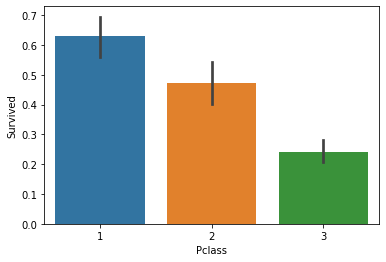

In [361]:
sns.barplot(x="Pclass",y="Survived",data=df_train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

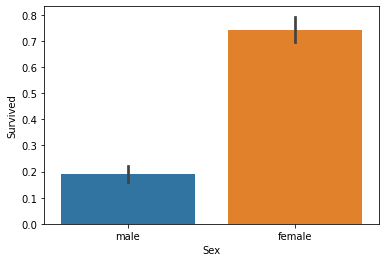

In [362]:
sns.barplot(x="Sex",y="Survived",data=df_train)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

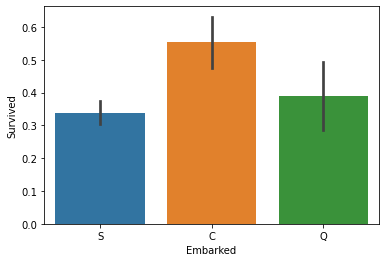

In [363]:
sns.barplot(x="Embarked",y="Survived",data=df_train)

### Data PreProcessing & Feature Engineering

In [365]:
# Processing
df_train["Embarked"] = df_train["Embarked"].fillna('mode')

#Replacing Columns
df_train['Family_size']= df_train['SibSp']+df_train['Parch']+1
df_test['Family_size']= df_test['SibSp']+df_test['Parch']+1

df_train['Title'] = df_train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_test['Title'] = df_test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

<AxesSubplot:xlabel='Survived', ylabel='Family_size'>

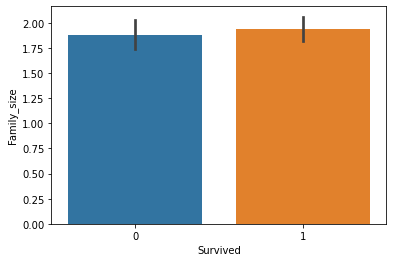

In [368]:
sns.barplot(y="Family_size",x="Survived",data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='Title'>

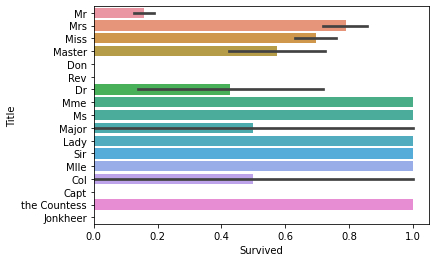

In [372]:
sns.barplot(y="Title",x="Survived",data=df_train)

#### Label Encoding

In [373]:
from sklearn.preprocessing import LabelEncoder

def dataEncoder(df_col):
    lbl= LabelEncoder()
    lbl.fit(list(df_col.values)) 
    return lbl.transform(list(df_col.values))

df_train['Sex'] = dataEncoder(df_train['Sex'])
df_train['Embarked'] = dataEncoder(df_train['Embarked'])
df_train['Title'] = dataEncoder(df_train['Title'])

df_test['Sex'] = dataEncoder(df_test['Sex'])
df_test['Embarked'] = dataEncoder(df_test['Embarked'])
df_test['Title'] = dataEncoder(df_test['Title'])
# df = pd.get_dummies(df_train, columns=["Sex","Embarked"])
# df["Sex"] = df["Sex"].replace(list({"male":0, "female":1})

### Normalize Data (Optional)

In [ ]:
# df_train[['Fare','Age']]=(df_train[['Fare','Age']]-df_train[['Fare','Age']].mean())/df_train[['Fare','Age']].std()

# df_test[['Fare','Age']]=(df_test[['Fare','Age']]-df_test[['Fare','Age']].mean())/df_test[['Fare','Age']].std()

### Drop Column & Fill Missing Values

In [374]:
X_train = df_train.drop(columns=['Survived','Ticket','Name','Cabin','SibSp','Parch'], axis=1)
y_train = df_train['Survived']

X_test = df_test.drop(columns=['Ticket','Name','Cabin','SibSp','Parch'], axis=1)

X_train["Age"] = X_train["Age"].fillna(X_train["Age"].mean())

X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

### Data Grouping (Optional)

In [337]:
# def age_transform(dataset):
#     dataset.loc[ dataset['Age'] <= 16, 'Age' ] = 0,
#     dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age' ] = 1,
#     dataset.loc[ (dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age' ] = 2,
#     dataset.loc[ (dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age' ] = 3,
#     dataset.loc[ dataset['Age'] > 62, 'Age' ] = 4,
#     return dataset

# def fare_transform(dataset):
#     dataset.loc[ dataset['Fare'] <= 17, 'Fare' ] = 0,
#     dataset.loc[ (dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare' ] = 1,
#     dataset.loc[ (dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare' ] = 2,
#     dataset.loc[ dataset['Fare'] > 100, 'Fare' ] = 4,
#     return dataset


# X_train = age_transform(X_train)
# X_test = age_transform(X_test)

# X_train = fare_transform(X_train)
# X_test = fare_transform(X_test)

---

## Modeling

### Extra Splitting for Experiment

In [375]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV

X_train_tr, X_train_ts, y_train_tr, y_train_ts =  train_test_split(X_train, y_train, test_size=0.25)

In [376]:
X_train

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family_size,Title
0,1,3,1,22.000000,7.2500,2,2,11
1,2,1,0,38.000000,71.2833,0,2,12
2,3,3,0,26.000000,7.9250,2,1,8
3,4,1,0,35.000000,53.1000,2,2,12
4,5,3,1,35.000000,8.0500,2,1,11
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,13.0000,2,1,14
887,888,1,0,19.000000,30.0000,2,1,8
888,889,3,0,29.699118,23.4500,2,4,8
889,890,1,1,26.000000,30.0000,0,1,11


### Instantiate & Hyperparameter Tuning

In [380]:
#Tuning
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

model = GradientBoostingClassifier()
param_grid = {'n_estimators':np.arange(20,160), 'max_depth':np.arange(2,4)}
# gscv = RandomizedSearchCV(model, n_iter=100, param_distributions=param_grid, scoring="roc_auc", cv=5)
gscv = GridSearchCV(model, param_grid=param_grid, scoring="accuracy", cv=5)
gscv.fit(X_train,y_train)

print(f" {gscv.best_params_}=> {gscv.best_score_}")

{'max_depth': 2, 'n_estimators': 30}=> 0.8081350825434687


In [381]:
model = RandomForestClassifier()
param_grid = {'n_estimators':np.arange(10,120)}
# gscv = RandomizedSearchCV(model, n_iter=100, param_distributions=param_grid, scoring="roc_auc", cv=5)
gscv = GridSearchCV(model, param_grid=param_grid, scoring="accuracy", cv=5)
gscv.fit(X_train,y_train)

print(f" {gscv.best_params_}=> {gscv.best_score_}")

{'n_estimators': 92}=> 0.8215742891218379


### Final Validation

In [385]:
# Functions
def printScore(model, X, y, cv=5):
    score = cross_validate(model, X, y, scoring="accuracy", cv=cv, return_train_score=True)
    print("Test score: ",score["test_score"].mean())
    print("Train score: ",score["train_score"].mean())

def double_test(model):
    model_a = model
    model_a.fit(X_train_tr, y_train_tr)
    printScore(model_a, X_train_ts, y_train_ts)

    model_b = model
    model_b.fit(X_train, y_train)
    printScore(model_b, X_train, y_train)

In [390]:
model_gb = GradientBoostingClassifier(n_estimators=2, max_depth=30)
double_test(model_gb)

model_rf = RandomForestClassifier(n_estimators = 92)
double_test(model_rf)

Test score:  0.7178787878787878
Train score:  1.0
Test score:  0.7498775971376561
Train score:  1.0
Test score:  0.8254545454545454
Train score:  0.9988764044943821
Test score:  0.8148829326470404
Train score:  1.0


### Final Fitting

In [391]:
# Final Fitting
chosen_model = model_rf

chosen_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=92)

### Predicting + Exporting Submission

In [392]:
y_pred = chosen_model.predict(X_test)

submission = pd.DataFrame()
submission['PassengerId'] = df_test["PassengerId"]
submission['Survived'] = y_pred
submission.to_csv('submission.csv',index=False)